In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [3]:
files = os.listdir('D:/downloads/dogs-vs-cats/train/')
categories=[]

for file in files:
    category=file.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

In [4]:
df = pd.DataFrame({
    'filename': files,
    'category': categories
})

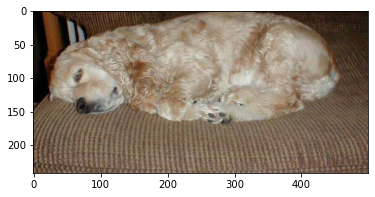

In [5]:
sample = random.choice(files)
image = load_img('D:/downloads/dogs-vs-cats/train/'+sample)
plt.imshow(image)

# 다른 코드 잠시

In [6]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

57344/57026 [==============================] - 0s 3us/step
(404, 13) (102, 13) (404,) (102,)


relu를 쓰는 이유 , 기울기 손실 문제???

페이스북에서 개발한 가중치 초기화 도구

In [7]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


In [11]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [9]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [12]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
434/434 [==============================] - 1s 3ms/step - loss: 2.5151 - accuracy: 0.0978 - val_loss: 2.3986 - val_accuracy: 0.0995
Epoch 2/100
434/434 [==============================] - 1s 3ms/step - loss: 2.3565 - accuracy: 0.0978 - val_loss: 2.3290 - val_accuracy: 0.0995
Epoch 3/100
434/434 [==============================] - 1s 3ms/step - loss: 2.3151 - accuracy: 0.0978 - val_loss: 2.3069 - val_accuracy: 0.1000
Epoch 4/100
434/434 [==============================] - 1s 3ms/step - loss: 2.3016 - accuracy: 0.0961 - val_loss: 2.2997 - val_accuracy: 0.0941
Epoch 5/100
434/434 [==============================] - 1s 3ms/step - loss: 2.2970 - accuracy: 0.1082 - val_loss: 2.2969 - val_accuracy: 0.0985
Epoch 6/100
434/434 [==============================] - 1s 3ms/step - loss: 2.2949 - accuracy: 0.1126 - val_loss: 2.2955 - val_accuracy: 0.1120
Epoch 7/100
434/434 [==============================] - 1s 2ms/step - loss: 2.2936 - accuracy: 0.1144 - val_loss: 2.2944 - val_accuracy: 0.1118

Epoch 58/100
434/434 [==============================] - 1s 2ms/step - loss: 2.2109 - accuracy: 0.3701 - val_loss: 2.2113 - val_accuracy: 0.3704
Epoch 59/100
434/434 [==============================] - 1s 3ms/step - loss: 2.2076 - accuracy: 0.3755 - val_loss: 2.2081 - val_accuracy: 0.3906
Epoch 60/100
434/434 [==============================] - 1s 3ms/step - loss: 2.2043 - accuracy: 0.3716 - val_loss: 2.2047 - val_accuracy: 0.4271
Epoch 61/100
434/434 [==============================] - 1s 2ms/step - loss: 2.2008 - accuracy: 0.4403 - val_loss: 2.2012 - val_accuracy: 0.4163
Epoch 62/100
434/434 [==============================] - 1s 2ms/step - loss: 2.1971 - accuracy: 0.4250 - val_loss: 2.1975 - val_accuracy: 0.4234
Epoch 63/100
434/434 [==============================] - 1s 3ms/step - loss: 2.1935 - accuracy: 0.4288 - val_loss: 2.1940 - val_accuracy: 0.4386
Epoch 64/100
434/434 [==============================] - 1s 3ms/step - loss: 2.1897 - accuracy: 0.4540 - val_loss: 2.1902 - val_accuracy:

In [13]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.8962 - accuracy: 0.5710
Test accuracy:  0.5709999799728394


activation funciton 을 바꾸면?

In [14]:
def mlp_model2():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [15]:
model = mlp_model2()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

Epoch 1/100
434/434 [==============================] - 2s 5ms/step - loss: 5.4823 - accuracy: 0.3642 - val_loss: 1.5066 - val_accuracy: 0.4879
Epoch 2/100
434/434 [==============================] - 1s 3ms/step - loss: 1.3467 - accuracy: 0.5298 - val_loss: 1.4314 - val_accuracy: 0.5000
Epoch 3/100
434/434 [==============================] - 1s 3ms/step - loss: 1.1641 - accuracy: 0.5848 - val_loss: 1.1208 - val_accuracy: 0.6116
Epoch 4/100
434/434 [==============================] - 2s 4ms/step - loss: 0.9882 - accuracy: 0.6669 - val_loss: 0.9665 - val_accuracy: 0.6571
Epoch 5/100
434/434 [==============================] - 2s 4ms/step - loss: 0.8034 - accuracy: 0.7483 - val_loss: 0.8107 - val_accuracy: 0.7589
Epoch 6/100
434/434 [==============================] - 2s 4ms/step - loss: 0.6944 - accuracy: 0.7790 - val_loss: 0.7230 - val_accuracy: 0.7596
Epoch 7/100
434/434 [==============================] - 1s 3ms/step - loss: 0.6279 - accuracy: 0.8056 - val_loss: 0.6404 - val_accuracy: 0.8012

Epoch 58/100
434/434 [==============================] - 1s 2ms/step - loss: 0.2294 - accuracy: 0.9301 - val_loss: 0.4867 - val_accuracy: 0.8798
Epoch 59/100
434/434 [==============================] - 1s 2ms/step - loss: 0.2257 - accuracy: 0.9310 - val_loss: 0.5346 - val_accuracy: 0.8687
Epoch 60/100
434/434 [==============================] - 1s 2ms/step - loss: 0.2287 - accuracy: 0.9295 - val_loss: 0.4463 - val_accuracy: 0.8875
Epoch 61/100
434/434 [==============================] - 1s 2ms/step - loss: 0.2221 - accuracy: 0.9325 - val_loss: 0.4535 - val_accuracy: 0.8880
Epoch 62/100
434/434 [==============================] - 1s 2ms/step - loss: 0.2225 - accuracy: 0.9319 - val_loss: 0.4537 - val_accuracy: 0.8899
Epoch 63/100
434/434 [==============================] - 1s 2ms/step - loss: 0.2207 - accuracy: 0.9328 - val_loss: 0.5016 - val_accuracy: 0.8838
Epoch 64/100
434/434 [==============================] - 1s 3ms/step - loss: 0.2200 - accuracy: 0.9322 - val_loss: 0.5075 - val_accuracy:

optimizer 를 바꾸면?

In [16]:
def mlp_model3():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [17]:
model = mlp_model3()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

Epoch 1/100
434/434 [==============================] - 2s 5ms/step - loss: 5.1394 - accuracy: 0.6104 - val_loss: 1.2762 - val_accuracy: 0.6816
Epoch 2/100
434/434 [==============================] - 2s 4ms/step - loss: 0.8694 - accuracy: 0.7646 - val_loss: 0.7980 - val_accuracy: 0.7852
Epoch 3/100
434/434 [==============================] - 2s 4ms/step - loss: 0.6097 - accuracy: 0.8306 - val_loss: 0.6196 - val_accuracy: 0.8333
Epoch 4/100
434/434 [==============================] - 2s 4ms/step - loss: 0.4815 - accuracy: 0.8607 - val_loss: 0.5638 - val_accuracy: 0.8571
Epoch 5/100
434/434 [==============================] - 1s 3ms/step - loss: 0.4157 - accuracy: 0.8835 - val_loss: 0.4577 - val_accuracy: 0.8778
Epoch 6/100
434/434 [==============================] - 1s 3ms/step - loss: 0.3865 - accuracy: 0.8910 - val_loss: 0.4521 - val_accuracy: 0.8785
Epoch 7/100
434/434 [==============================] - 1s 3ms/step - loss: 0.3495 - accuracy: 0.9021 - val_loss: 0.4211 - val_accuracy: 0.8889

Epoch 55/100
434/434 [==============================] - 1s 3ms/step - loss: 0.0349 - accuracy: 0.9905 - val_loss: 0.4276 - val_accuracy: 0.9407
Epoch 56/100
434/434 [==============================] - 1s 3ms/step - loss: 0.0412 - accuracy: 0.9887 - val_loss: 0.4113 - val_accuracy: 0.9433
Epoch 57/100
434/434 [==============================] - 1s 3ms/step - loss: 0.0534 - accuracy: 0.9854 - val_loss: 0.3650 - val_accuracy: 0.9429
Epoch 58/100
434/434 [==============================] - 1s 3ms/step - loss: 0.0310 - accuracy: 0.9905 - val_loss: 0.4372 - val_accuracy: 0.9406
Epoch 59/100
434/434 [==============================] - 1s 3ms/step - loss: 0.0425 - accuracy: 0.9881 - val_loss: 0.3973 - val_accuracy: 0.9438
Epoch 60/100
434/434 [==============================] - 1s 3ms/step - loss: 0.0402 - accuracy: 0.9885 - val_loss: 0.4365 - val_accuracy: 0.9409
Epoch 61/100
434/434 [==============================] - 1s 3ms/step - loss: 0.0414 - accuracy: 0.9876 - val_loss: 0.4235 - val_accuracy: